# ` COVID-19 Detection Using Artificial Neural Networks 🔻🔻`

# By:

- [Mohammed Salf Shaeerah 🧠🪐](https://github.com/Mo-Shaeerah)

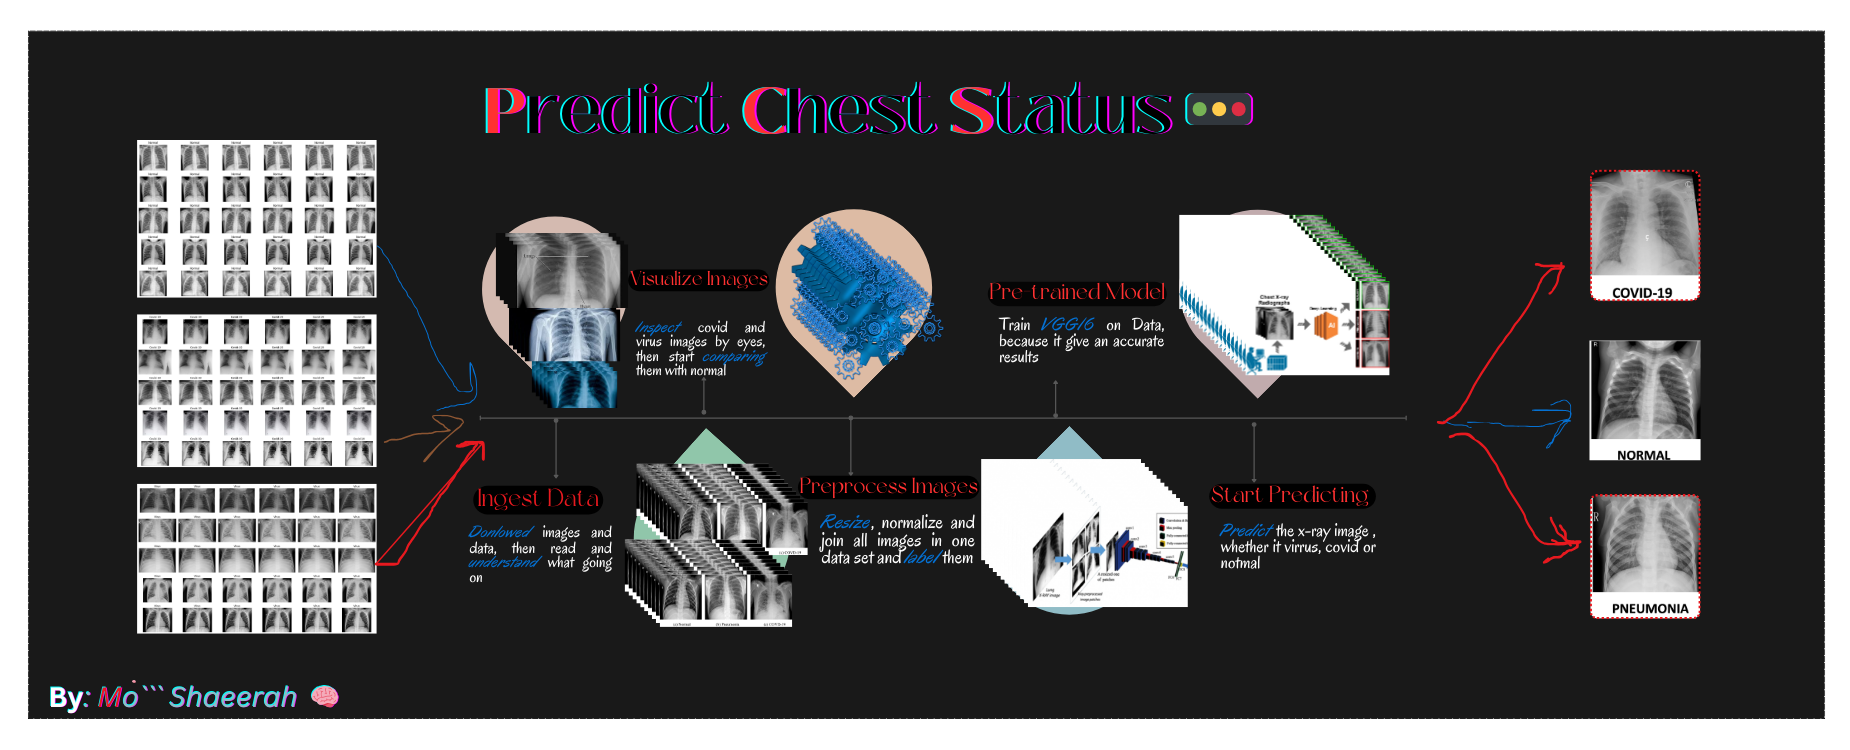

# `1- Bring Libraries 📞📞`

In [1]:
# Import Or activate tools & libraries

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential

from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt, tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os, cv2, numpy as np, pandas as pd, seaborn as sns #visualkeras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

# Avoid future Warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

2024-04-04 20:41:14.283712: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-04 20:41:14.283826: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-04 20:41:14.583932: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# `2- Read, understand & Interpret data 🔍❗`

In [2]:
# Data path  
Main_path = '/kaggle/input/chest-x-ray-images/'

train = pd.read_csv(Main_path + 'train.csv')

display(
    train.sample(5),
    ('-------------------------'),

    train.shape,
    ('-------------------------'),

    train.info(),
    ('-------------------------'),

    train.describe(),
    ('-------------------------'),

    train.keys(),
    ('-------------------------'),

    train.Label.unique()
    )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   1196 non-null   object
 1   Label   1196 non-null   object
dtypes: object(2)
memory usage: 18.8+ KB


,Image,Label
1026,483924342.jpeg,normal
661,400451675.jpeg,virus
193,508497634.jpeg,virus
969,586506520.jpeg,virus
1143,32593495.jpeg,virus


'-------------------------'

(1196, 2)

'-------------------------'

None

'-------------------------'

,Image,Label
count,1196,1196
unique,1196,3
top,327147141.jpeg,normal
freq,1,468


'-------------------------'

Index(['Image', 'Label'], dtype='object')

'-------------------------'

array(['normal', 'virus', 'covid'], dtype=object)

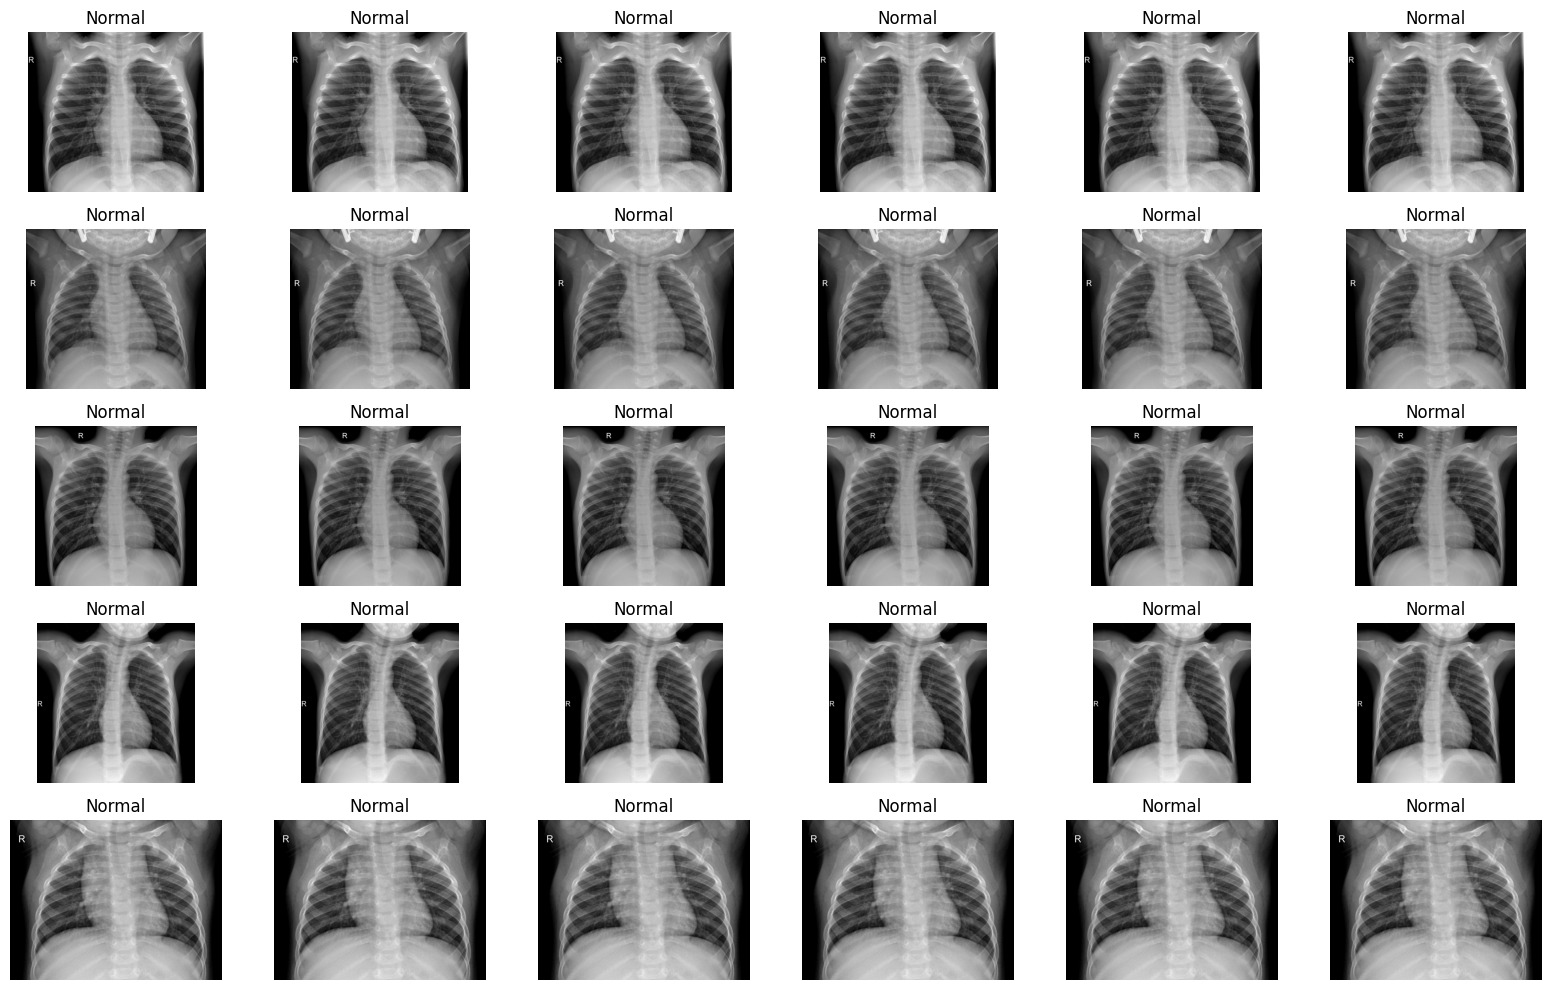

In [3]:
# Let's display Normal Chest X-ray

Normal_url = Main_path + "/train/normal/"

rows = 5
columns = 6

normal = os.listdir(Normal_url)
fig, ax = plt.subplots(rows, columns, figsize=(16, 10))

for row in range(rows):

  for col in range(columns):
    image = plt.imread(Normal_url + normal[row])
    ax[row, col].imshow(image, cmap='gray')
    ax[row, col].axis('off')
    ax[row, col].set_title('Normal')

plt.tight_layout()
plt.show()

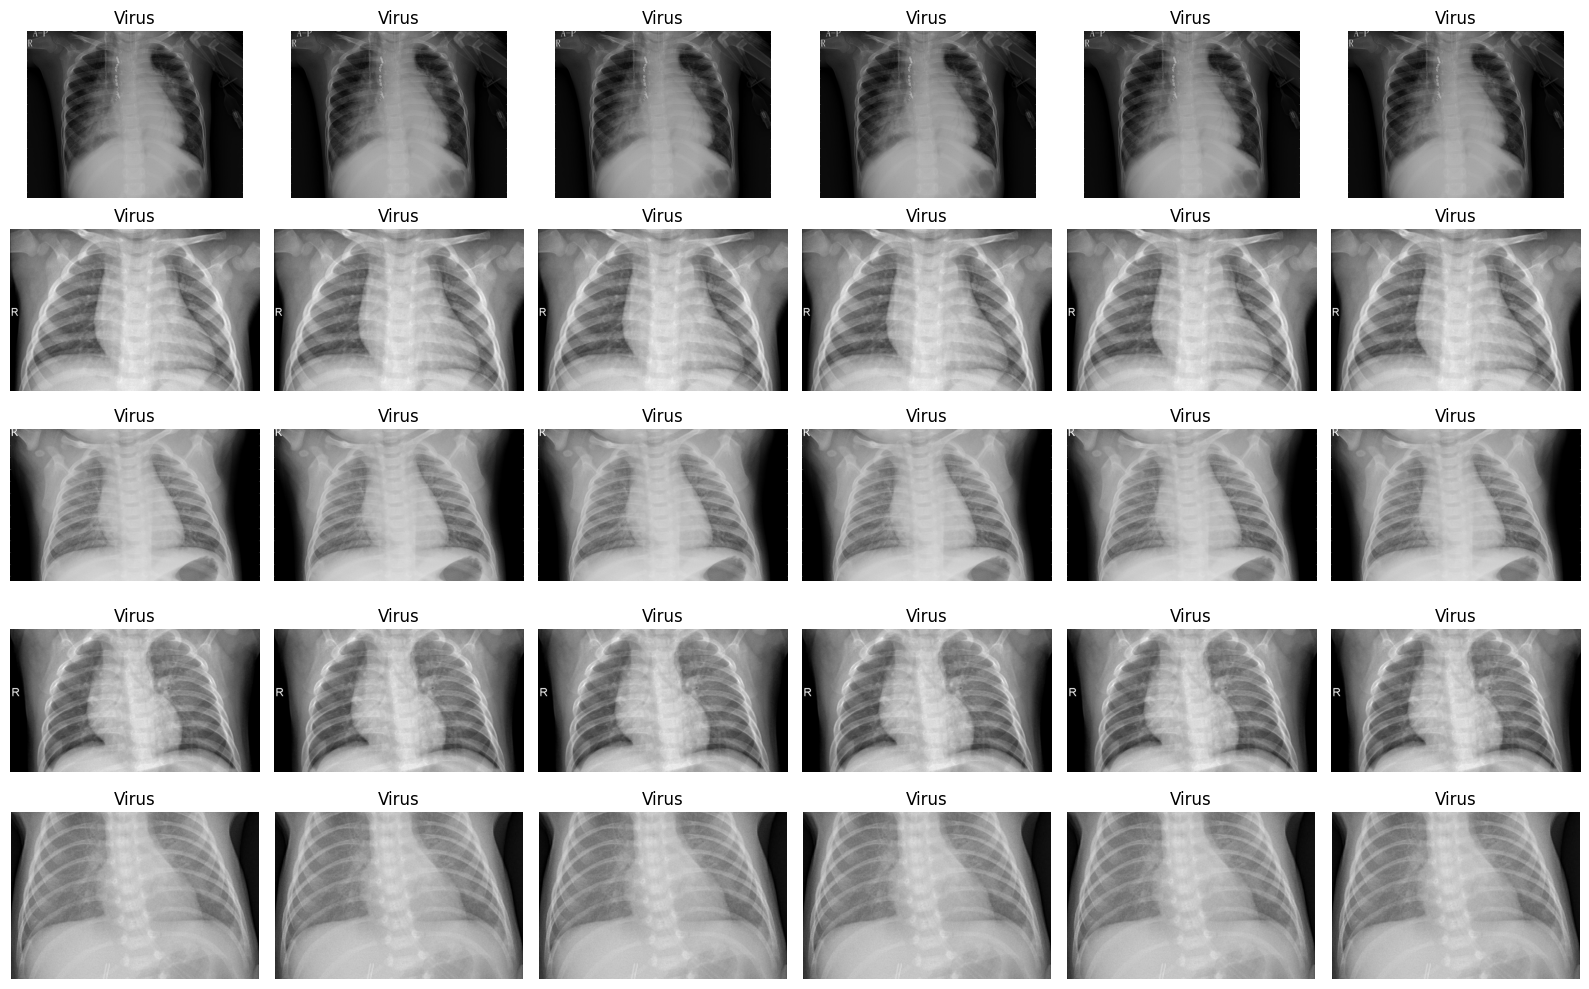

In [4]:
# Let's display Virus Chest X-ray

Virus_url = Main_path + "/train/virus/"

rows = 5
columns = 6

virus = os.listdir(Virus_url)
fig, ax = plt.subplots(rows, columns, figsize=(16, 10))

for row in range(rows):

  for col in range(columns):
    image = plt.imread(Virus_url + virus[row])
    ax[row, col].imshow(image, cmap='gray')
    ax[row, col].axis('off')
    ax[row, col].set_title('Virus')

plt.tight_layout()
plt.show()

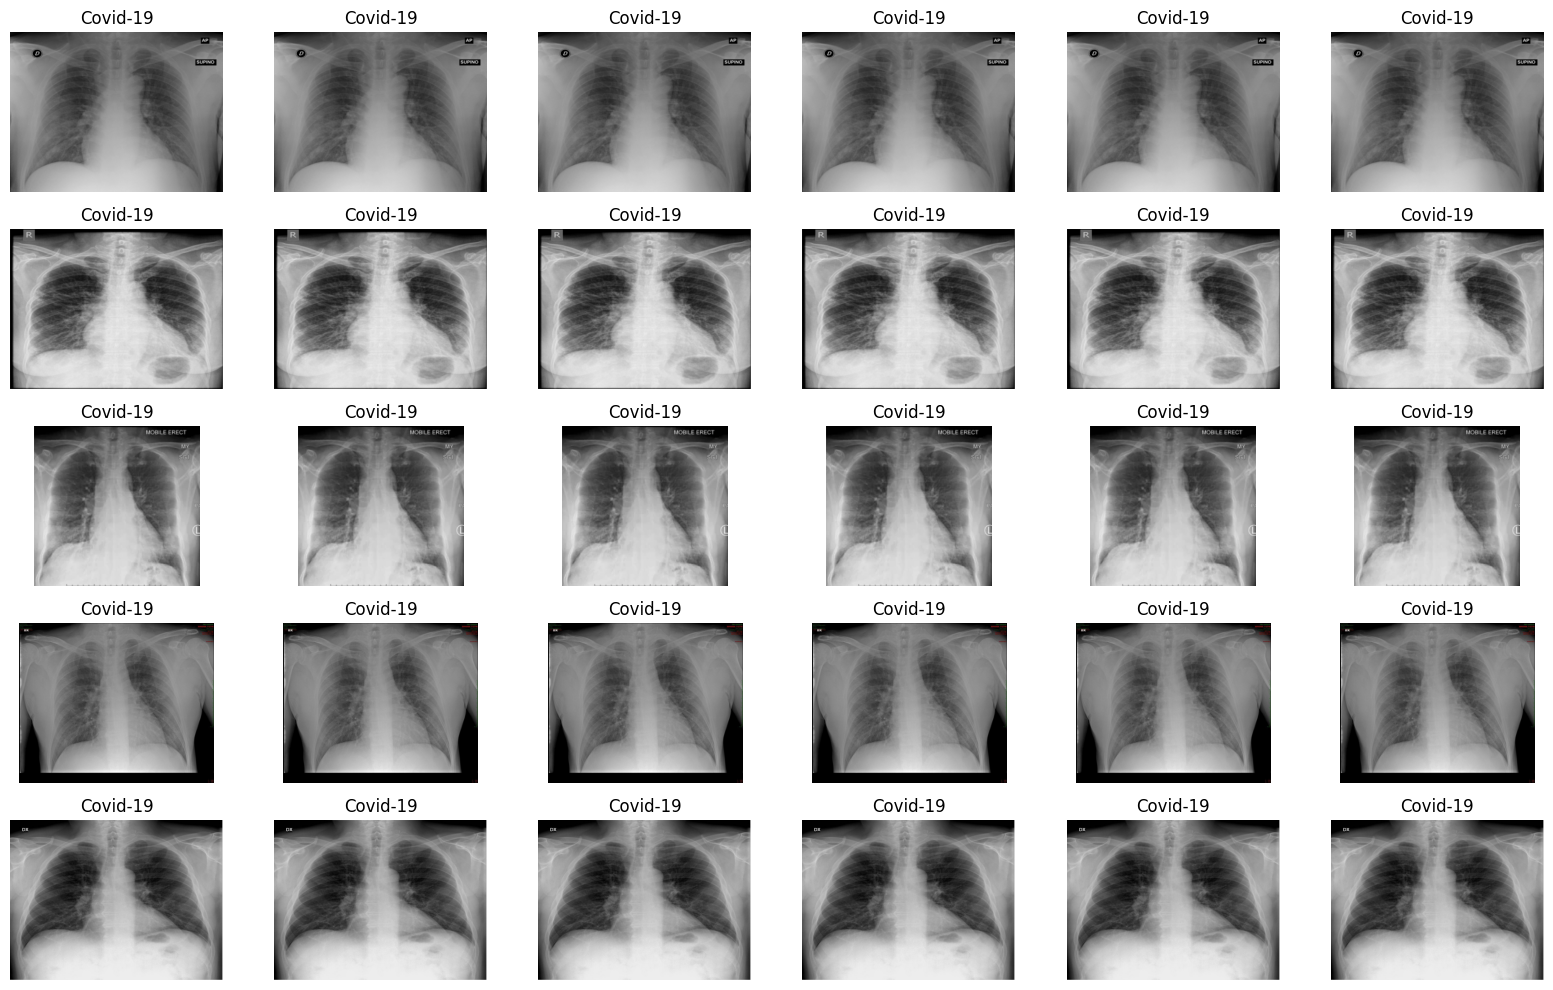

In [5]:
# Let's display COVID-19 Chest X-ray

Covid_url = Main_path + "/train/covid/"

rows = 5
columns = 6

covid = os.listdir(Covid_url)
fig, ax = plt.subplots(rows, columns, figsize=(16, 10))

for row in range(rows):

  for col in range(columns):
    image = plt.imread(Covid_url + covid[row])
    ax[row, col].imshow(image, cmap='gray')
    ax[row, col].axis('off')
    ax[row, col].set_title('Covid-19')

plt.tight_layout()
plt.show()

# `3- Preprocess data & preper it for modeling station 💉💉`

In [6]:
# Do empty list for data & labels
data = []
labels = []

# Handle covid images
covid = os.listdir(Covid_url)
for a in covid:
    image = cv2.imread(Covid_url+a,)
    image = cv2.resize(image, (224, 224))

    data.append(image)
    labels.append(0)

# Handle Normal images
normal = os.listdir(Normal_url)
for b in normal:
    image = cv2.imread(Normal_url +b,)
    image = cv2.resize(image, (224, 224))

    data.append(image)
    labels.append(1)

# Handle Virus images
virus=os.listdir(Virus_url)
for c in virus:
    image = cv2.imread(Virus_url+c,)
    image = cv2.resize(image, (224, 224))

    data.append(image)
    labels.append(2)


display(
    len(data),

    len(labels)
)

1196

1196

In [7]:
# Make data and its labels in numpy format
X_data , y_data= np.array(data) / 255.0,  np.array(labels)

# Check shape
display(
    X_data.shape, y_data.shape
    )

(1196, 224, 224, 3)

(1196,)

In [8]:
# Split the data into training and validation sets (80% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, stratify=y_data, test_size=0.25, random_state=42)

# Print the shapes of the training and validating sets
for data, name in [(X_train, 'X_train'), (y_train, 'y_train'), (X_val, 'X_val'), (y_val, 'y_val')]:
    print(f"{name} shape:", data.shape)

X_train shape: (897, 224, 224, 3)
y_train shape: (897,)
X_val shape: (299, 224, 224, 3)
y_val shape: (299,)


In [9]:
# Handle the classes
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=3)

display(
    y_train.shape, y_val.shape
    )

(897, 3)

(299, 3)

# `4- Do modeling by transfer learning 🦅🦅`

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


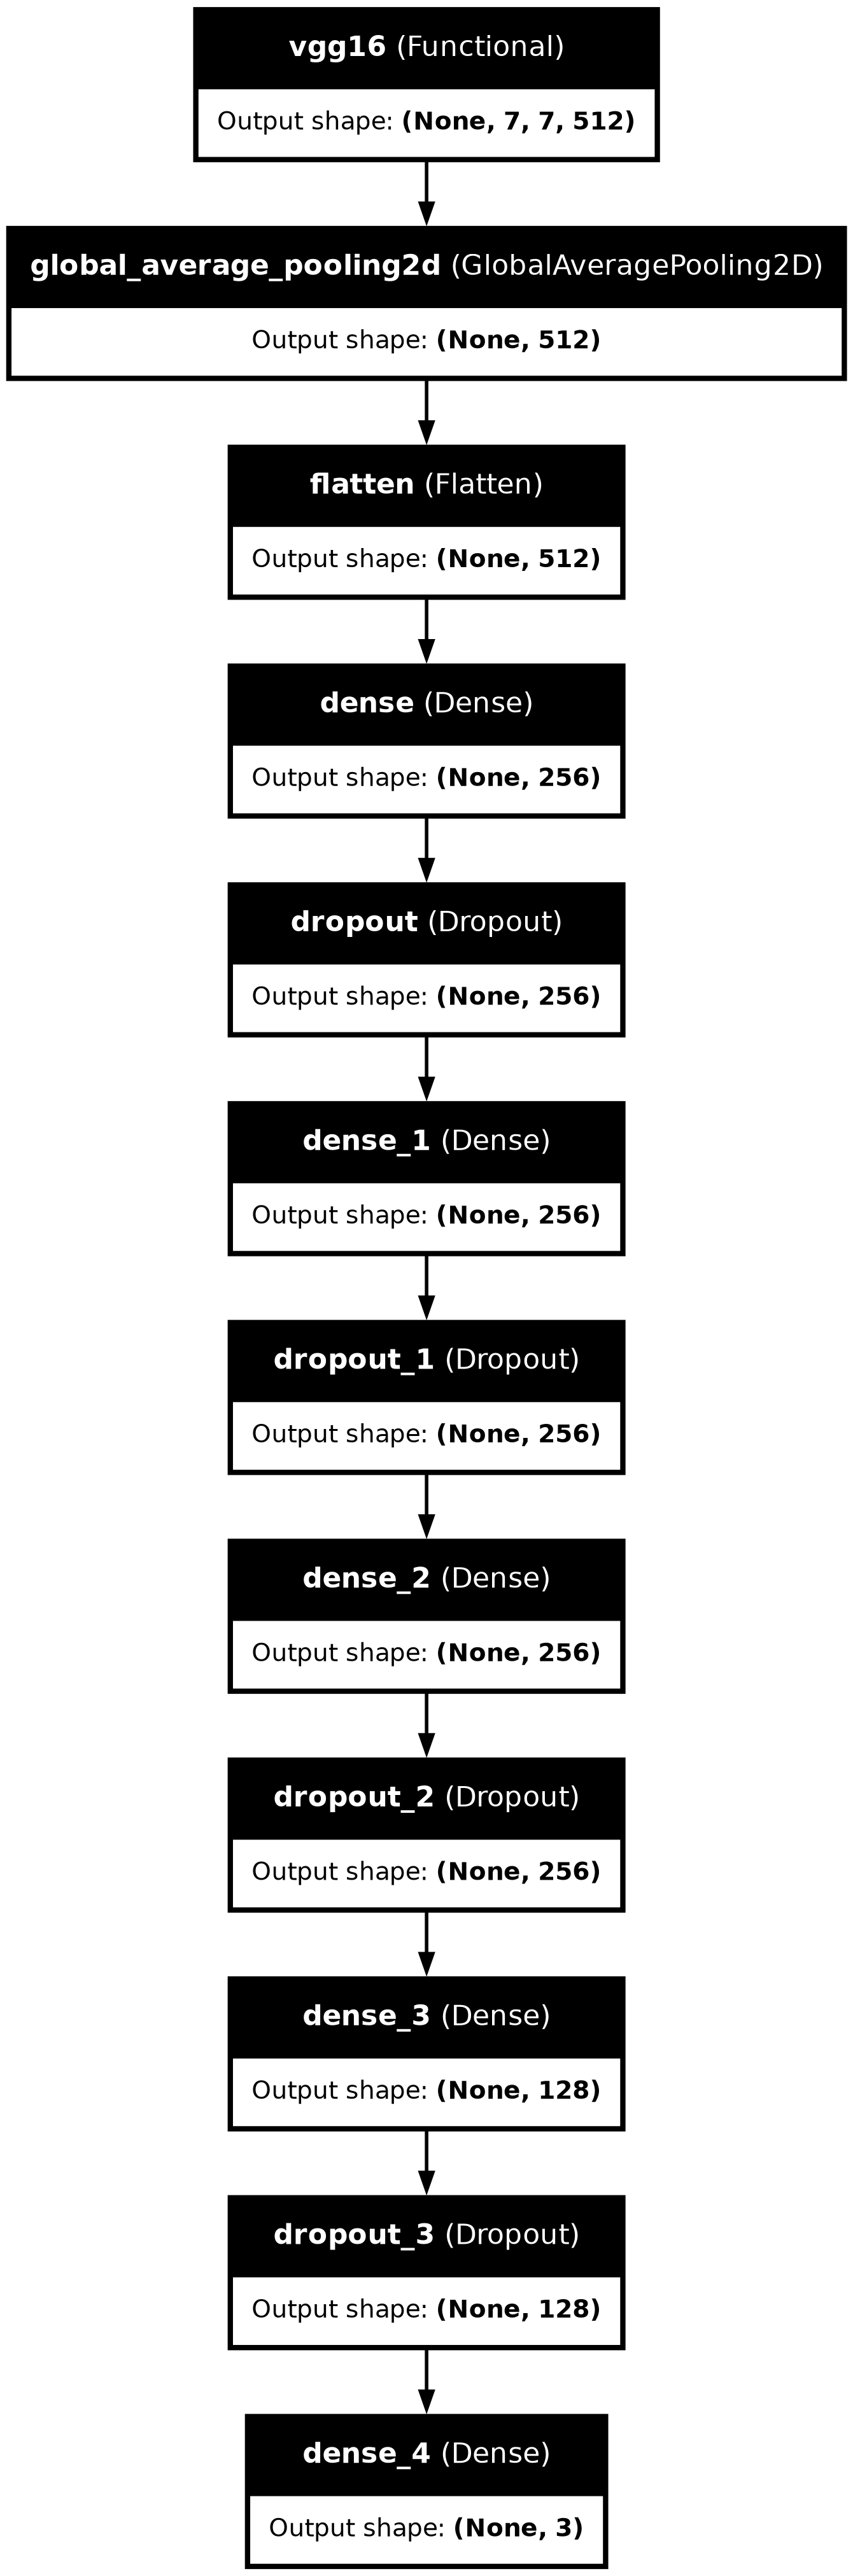

In [10]:
# Load pre-trained VGG16 model without the top (classification) layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers so they're not updated during training
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the pre-trained model
pre_model = Sequential([
    base_model,

    GlobalAveragePooling2D(),

    Flatten(),

    Dense(256, activation='relu'),
    Dropout(0.3),

    Dense(256, activation='relu'),
    Dropout(0.3),

    Dense(256, activation='relu'),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(3, activation='softmax')
])

# Build the model
pre_model.build((None, 224, 224, 3))

# Visualize NN architecture
plot_model(pre_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, dpi=200)

# `Model architecture visualization using visualkeras librarey:`

- Code: visualkeras.layered_view(pre_model, legend=True, scale_xy=25, draw_funnel=True, draw_volume=False, spacing=77) 
- Kaggle gaving me errors When using this code

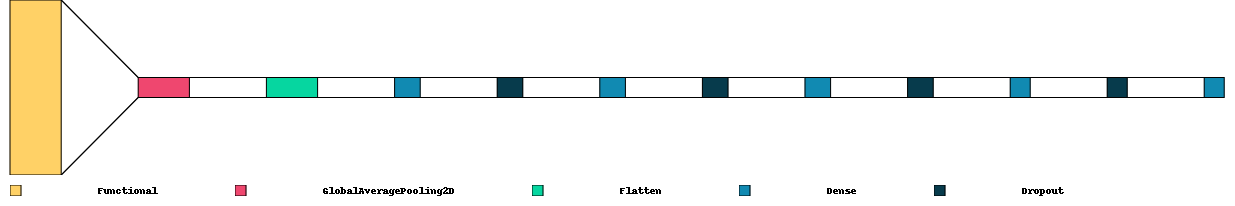

In [11]:
# Compile the pre_trained model
pre_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(patience=10, monitor='val_loss', restore_best_weights = True, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', verbose=1)

# Train the model
history = pre_model.fit(X_train,
                        y_train,
                        verbose=1,
                        epochs=50,
                        batch_size=32,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping, model_checkpoint],
                        )

# Load the best model
pre_model.load_weights('best_model.keras')

# Evaluate the model on the test set
test_loss, test_accuracy = pre_model.evaluate(X_val, y_val)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
 1/29 ━━━━━━━━━━━━━━━━━━━━ 17:06 37s/step - accuracy: 0.4062 - loss: 1.1304

I0000 00:00:1712263381.342300      76 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712263381.363115      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.3694 - loss: 1.1312

W0000 00:00:1712263394.976394      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 1.07274, saving model to best_model.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 64s 965ms/step - accuracy: 0.3692 - loss: 1.1308 - val_accuracy: 0.3913 - val_loss: 1.0727
Epoch 2/50
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.4114 - loss: 1.1057
Epoch 2: val_loss improved from 1.07274 to 1.05558, saving model to best_model.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.4115 - loss: 1.1038 - val_accuracy: 0.3913 - val_loss: 1.0556
Epoch 3/50
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.3624 - loss: 1.1032
Epoch 3: val_loss improved from 1.05558 to 1.03658, saving model to best_model.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.3644 - loss: 1.1015 - val_accuracy: 0.3913 - val_loss: 1.0366
Epoch 4/50
28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.4241 - loss: 1.0731
Epoch 4: val_loss improved from 1.03658 to 1.01975, saving model to best_model.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 

# `5- Check model Performance & Accuracy 🏋️‍♂️🏋️‍♂️`

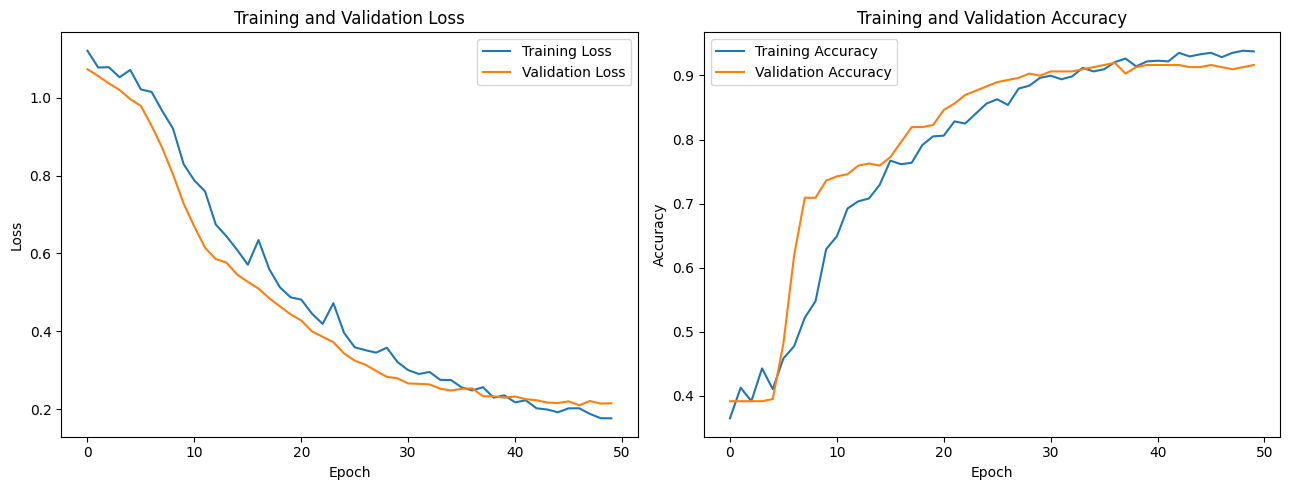

In [12]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Plot training and validation loss
for ax, data_type in zip(axes, [('loss', 'Training Loss', 'Validation Loss'),
                                 ('accuracy', 'Training Accuracy', 'Validation Accuracy')]):

  ax.plot(history.history[data_type[0]], label=data_type[1])
  ax.plot(history.history[f'val_{data_type[0]}'], label=data_type[2])
  ax.set_title(f'Training and Validation {data_type[1].split()[1]}')
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Loss' if data_type[0] == 'loss' else 'Accuracy')
  ax.legend()

plt.tight_layout()
plt.show()

In [13]:
# Classification Report

y_val = np.argmax(y_val, axis=1)
model_predict, = pre_model.predict(X_val),
model_predict = np.argmax(model_predict, axis=1)

print(classification_report(y_val, model_predict))

 2/10 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step

W0000 00:00:1712263671.236057      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        74
           1       0.88      0.92      0.90       117
           2       0.91      0.88      0.90       108

    accuracy                           0.91       299
   macro avg       0.92      0.92      0.92       299
weighted avg       0.91      0.91      0.91       299



In [14]:
# Confusion matrix in a data frame format
pd.DataFrame(confusion_matrix(y_val, model_predict), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,70,3,1
normal,1,108,8
virus,1,12,95


# `6- Testing And submission part 📥📤`

In [15]:
# Test images directory
test_url = Main_path + 'test/'

# Define target size for resizing
target_size = (224, 224)

# Initialize list to store preprocessed test images
test_images_preprocessed = []

# Load and preprocess test images
for filename in os.listdir(test_url):

    image = cv2.imread(os.path.join(test_url, filename))

    if image is not None:
        resized_image = cv2.resize(image, target_size)
        normalized_image = resized_image / 255.0  # Normalize pixel values
        test_images_preprocessed.append(normalized_image)

# Convert list of preprocessed images to numpy array
test_data = np.array(test_images_preprocessed)

test_data.shape

(513, 224, 224, 3)

In [16]:
# Lets read sample data
sample = pd.read_csv(Main_path + 'sample_submission.csv')

sample

,Image,Label
0,402124007.png,NaN
1,20328626.jpeg,NaN
2,21235419.jpeg,NaN
3,188238579.png,NaN
4,266831585.jpeg,NaN
...,...,...
508,232629532.jpeg,NaN
509,256499192.jpeg,NaN
510,223507116.jpeg,NaN
511,178434487.jpeg,NaN


In [17]:
# Make predictions on the preprocessed test images
predictions = pre_model.predict(test_data)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Assuming you have a mapping of class indices to class labels
class_labels = {0: 'normal', 1: 'virus', 2: 'covid'}

# Convert predicted class indices to class labels
predicted_class = [class_labels[label] for label in predicted_labels]

#
sample['Label'] = predicted_class

sample

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step


,Image,Label
0,402124007.png,virus
1,20328626.jpeg,virus
2,21235419.jpeg,covid
3,188238579.png,covid
4,266831585.jpeg,covid
...,...,...
508,232629532.jpeg,virus
509,256499192.jpeg,normal
510,223507116.jpeg,normal
511,178434487.jpeg,virus


In [18]:
sample.to_csv('COVID-19_Detection.csv', index=False)

In [19]:
#!cat COVID-19_Detection.csv

# `Done e`` Love By:`

- [Mohammed Salf Shaeerah](https://github.com/Mo-Shaeerah)